# Proba V Super Resolution

PROBA-V is an earth observation satellite designed to map land cover and vegetation growth across the entire globe. It was launched on the 6th of May 2013 into a sun-synchronous orbit at an altitude of 820km. It's payload sensors allow for an almost global coverage (90%) per day, providing 300m resolution images. PROBA-V also provides 100m "high resolution" images, but at a lower frequency, of roughly every 5 days (dependent on the location).

The goal of this challenge is to construct such high-resolution images (similar to the 100m 'high resolution' images) by fusion of the more frequent 300m images (low resolution images). 

$Data$: the data is composed of radiometrically and geometrically corrected Top-Of-Atmosphere (TOA) reflectances for the RED and NIR spectral bands at 300m and 100m resolution in Plate Carrée projection. The 300m resolution data is delivered as 128x128 grey-scale pixel images (Low Resolution = LR), the 100m resolution data as 384x384 grey-scale pixel images (High Resolution = HR). The bit-depth of the images is 14, but they are saved in a 16-bit .png-format (which makes them look relatively dark if opened in typical image viewers).

Each image comes with a quality map (QM), indicating which pixels in the image are concealed (i.e. clouds, cloud shadows, ice, water, missing, etc) and which should be considered clear. For an image to be included in the dataset, at least 75% of its pixels have to be clear for 100m resolution images, and 60% for 300m resolution images. Each data-point consists of exactly one 100m resolution image (HR) and several 300m resolution images (LR) from the same scene. In total, the dataset contains 1450 scenes, which are split into 1160 scenes for training and 290 scenes for testing. On average, each scene comes with 19 different low resolution images and always with at least 9. The goal is to submit a 384x384 image for each of the 290 test-scenes, for which there are no high resolution images provided.

In [1]:
from functions_baseline_opencv import load_data, get_scene, score_scene, baseline_predict_scene, baseline_predict, baseline_predict_test, save_prediction
import os
import cv2
import skimage
import numpy as np
data_test = load_data(os.path.join("data","test.txt"), istrain=False)
datas = load_data(os.path.join("data","train.txt"), istrain=True)
def load_image(path):
    return skimage.img_as_float64( cv2.imread(path , -1) )

In [2]:
from matplotlib import pyplot as plt
## NIR
LR, QM, Norm, SM, HR = datas[0]
hr = load_image(HR)
sm = load_image(SM)
lr = np.array([load_image(p) for p in LR])
qm = np.array([load_image(p) for p in QM])
fig = plt.figure(figsize=(12,12))
min_ = 0.
max_ = 0.2
ax1 = fig.add_subplot(331); ax1.imshow(hr, vmin=min_, vmax=max_); ax1.axis('on'); ax1.title.set_text('High Resolution')
ax2 = fig.add_subplot(332); ax2.imshow(sm, vmin=min_, vmax=max_); ax2.axis('on'); ax2.title.set_text('Clearance pixel')
ax3 = fig.add_subplot(333); ax3.imshow(sm*hr, vmin=min_, vmax=max_); ax3.axis('on'); ax3.title.set_text('Clearance x High Resolution')
ax4 = fig.add_subplot(334); ax4.imshow(lr[0]*qm[0], vmin=min_, vmax=max_); ax4.axis('on'); ax4.title.set_text('Clearance Low Resolution 1')
ax5 = fig.add_subplot(335); ax5.imshow(lr[1]*qm[1], vmin=min_, vmax=max_); ax5.axis('on'); ax5.title.set_text('Clearance Low Resolution 2')
ax6 = fig.add_subplot(336); ax6.imshow(lr[2]*qm[2], vmin=min_, vmax=max_); ax6.axis('on'); ax6.title.set_text('Clearance Low Resolution 3')
ax7 = fig.add_subplot(337); ax7.imshow(lr[0], vmin=min_, vmax=max_); ax7.axis('on'); ax7.title.set_text(' Low Resolution 1')
ax8 = fig.add_subplot(338); ax8.imshow(lr[1], vmin=min_, vmax=max_); ax8.axis('on'); ax8.title.set_text(' Low Resolution 2')
ax9 = fig.add_subplot(339); ax9.imshow(lr[2], vmin=min_, vmax=max_); ax9.axis('on'); ax9.title.set_text(' Low Resolution 3')

plt.tight_layout()
print(qm[0].sum(), qm[1].sum(), qm[2].sum())

14915.0 15600.0 11746.0


14768.0 10362.0 13668.0


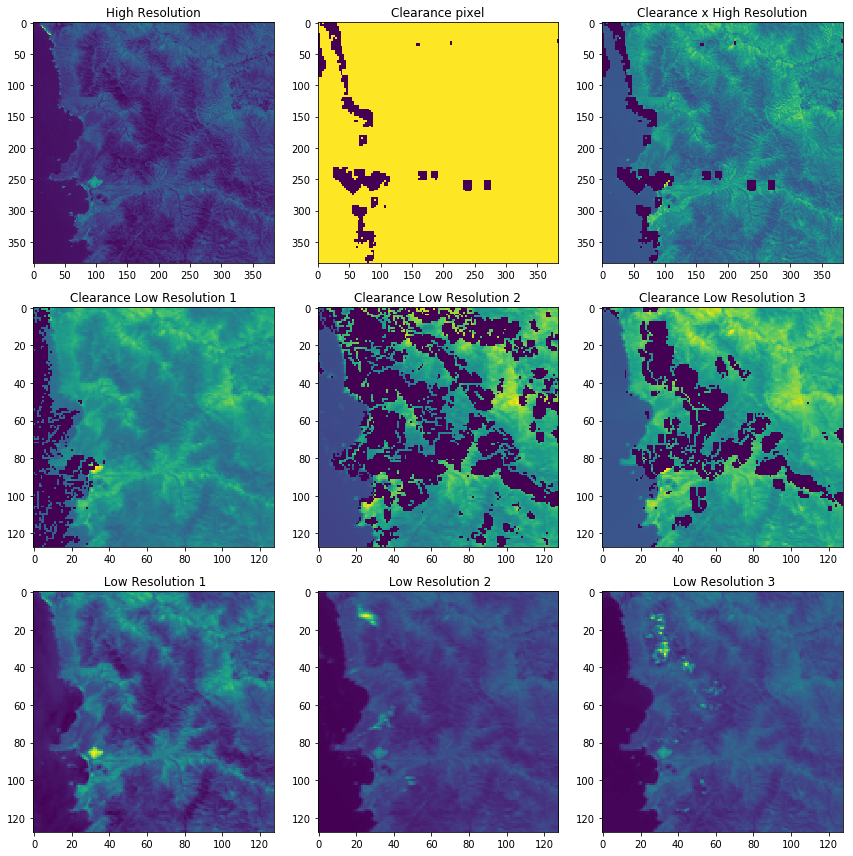

In [3]:
## RED
LR, QM, Norm, SM, HR = datas[-1]
hr = load_image(HR)
sm = load_image(SM)
lr = np.array([load_image(p) for p in LR])
qm = np.array([load_image(p) for p in QM])
fig = plt.figure(figsize=(12,12))
mean = lr[0].mean()
std = lr[0].std()
min_ = None
max_ = None
ax1 = fig.add_subplot(331); ax1.imshow(hr, vmin=min_, vmax=max_); ax1.axis('on'); ax1.title.set_text('High Resolution')
ax2 = fig.add_subplot(332); ax2.imshow(sm, vmin=min_, vmax=max_); ax2.axis('on'); ax2.title.set_text('Clearance pixel')
ax3 = fig.add_subplot(333); ax3.imshow(sm*hr, vmin=min_, vmax=max_); ax3.axis('on'); ax3.title.set_text('Clearance x High Resolution')
ax4 = fig.add_subplot(334); ax4.imshow(lr[0]*qm[0], vmin=min_, vmax=max_); ax4.axis('on'); ax4.title.set_text('Clearance Low Resolution 1')
ax5 = fig.add_subplot(335); ax5.imshow(lr[1]*qm[1], vmin=min_, vmax=max_); ax5.axis('on'); ax5.title.set_text('Clearance Low Resolution 2')
ax6 = fig.add_subplot(336); ax6.imshow(lr[2]*qm[2], vmin=min_, vmax=max_); ax6.axis('on'); ax6.title.set_text('Clearance Low Resolution 3')
ax7 = fig.add_subplot(337); ax7.imshow(lr[0], vmin=min_, vmax=max_); ax7.axis('on'); ax7.title.set_text(' Low Resolution 1')
ax8 = fig.add_subplot(338); ax8.imshow(lr[1], vmin=min_, vmax=max_); ax8.axis('on'); ax8.title.set_text(' Low Resolution 2')
ax9 = fig.add_subplot(339); ax9.imshow(lr[2], vmin=min_, vmax=max_); ax9.axis('on'); ax9.title.set_text(' Low Resolution 3')

plt.tight_layout()
print(qm[0].sum(), qm[1].sum(), qm[2].sum())

As we can see, the more clear pixel we have and better is the quality of the low Resolution. We can also see that the Low Resolution have less details compare to the high resolution which seems logic. 

So, an idea of baseline can be to take the image with the max number of clear pixel (if there are multiples, take them all), resize them in the High Resolution shape using opencv resize function (and average the images if they are multiples images with the same max number of clear pixel).

# METRIC :

So we have 5 informations :

    - LR image which represents the image in low resolution
    - QM image which represents which pixels are cleared in the LR image
    - a norm value which will be used in the calculus of the metric
    - an HR image which reprents the image in high resolution. The goal is to transform the LR image into an image  as close as the HR image. The image predicted is called SR.
    - an SM  image which represents which pixels are cleared in the HR image.
    
To compute the metric, the Peak Signal Noise Ratio (PSNR) is used as the starting point. PSNR is based on the pixel-wise Mean Square Error (MSE) which we can easily restrict to clear (i.e. unconcealed) pixels, as reconstruction of clouds is meaningless. A potential drawback of PSNR is a high sensitivity towards biases in brightness. That is why, the intensities of the submitted images is equalized such that the average pixel brightness of both images match (HR and SR). We call b the bias whose goal is to equalize the brightness.
![image](image/bias.png)

We can compute now the modified mean squarred error (cMSE) which take in account the bias of the brightness.
![image](image/cmse.png)
We can deduce the PSNR modified for brightness and clouds cPSNR : 
![image](image/cpsnr.png)

The metric used in this challenge, take in account pixel-shifts. To compensate it, the submitted images are cropped by a 3 pixel border, resulting in a 378x378 format. These cropped images are then evaluated at the corresponding patches around the center of the ground-truth images, with the highest cPSNR being the score. In the following, HR is the ground-truth image and SR the submitted image, both in 384x384 resolution. We denote the cropped 378x378 images as follows: for all u,v∈{0,…,6}, HRu,v is the subimage of HR with its upper left corner at coordinates (u,v) and its lower right corner at (378+u,378+v). Analogously, SR3,3 is the center part of SR used for comparison. As this patch is always the same, we will omit the (3,3) offset in the notation and write SR instead of SR_{3,3} for simplicity. (see [here link](https://kelvins.esa.int/proba-v-super-resolution/scoring/) )

So the score for one image is as follow:
![image](image/score_scene.png)
and for all the test set :
![image](image/score_total.png)


N is the norm value associated for each imageset. These values are provided in the csv file. The goal is to minimize Z. If Z is below 1.0, it means the submitted images are in average better than the baseline used by the creator of the challenge.

# Baseline

An idea of baseline can be to take the image with the max number of clear pixel (if there are multiples, take them all), resize them in the High Resolution shape using opencv resize function (and average the images if they are multiples images with the same max number of clear pixel).

Let's compare the Low resolution image, Hight resolution image, clearance image and "High resolution" image using interpolation.

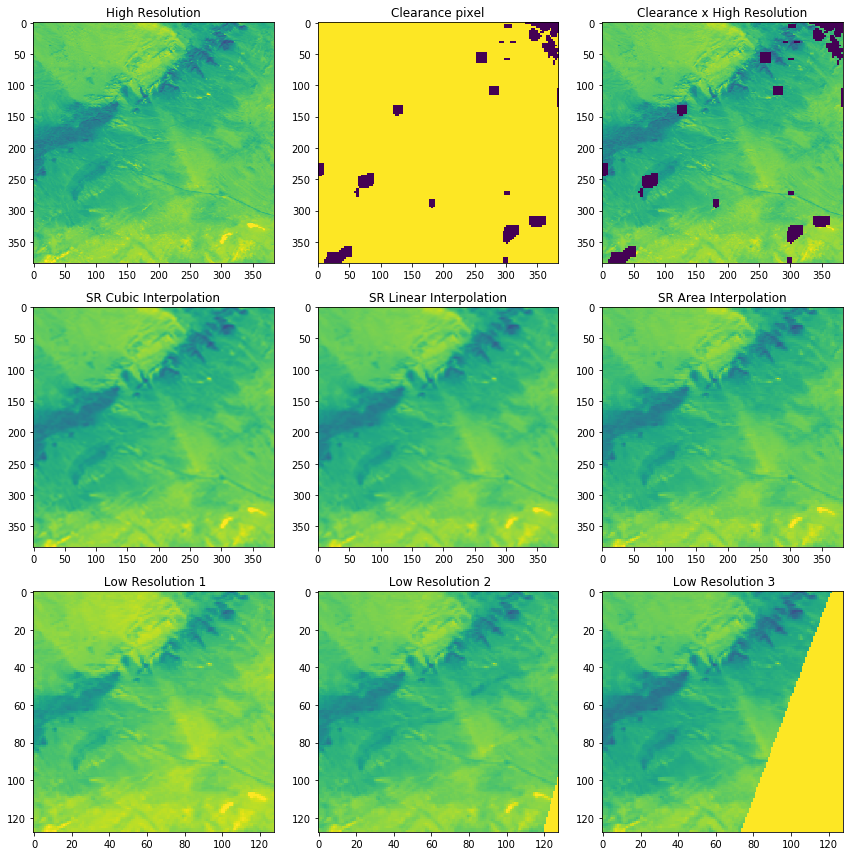

In [4]:
## NIR
LR, QM, Norm, SM, HR = datas[0]
hr = load_image(HR)
sm = load_image(SM)
lr = np.array([load_image(p) for p in LR])
qm = np.array([load_image(p) for p in QM])

average_prediction1 = baseline_predict_scene(LR, QM, interpolation=cv2.INTER_CUBIC)
average_prediction2 = baseline_predict_scene(LR, QM, interpolation=cv2.INTER_LINEAR)
average_prediction3 = baseline_predict_scene(LR, QM, interpolation=cv2.INTER_AREA)
fig = plt.figure(figsize=(12,12))
min_ = 0.
max_ = 0.2
ax1 = fig.add_subplot(331); ax1.imshow(hr, vmin=min_, vmax=max_); ax1.axis('on'); ax1.title.set_text('High Resolution')
ax2 = fig.add_subplot(332); ax2.imshow(sm, vmin=min_, vmax=max_); ax2.axis('on'); ax2.title.set_text('Clearance pixel')
ax3 = fig.add_subplot(333); ax3.imshow(sm*hr, vmin=min_, vmax=max_); ax3.axis('on'); ax3.title.set_text('Clearance x High Resolution')
ax4 = fig.add_subplot(334); ax4.imshow(average_prediction1, vmin=min_, vmax=max_); ax4.axis('on'); ax4.title.set_text('SR Cubic Interpolation')
ax5 = fig.add_subplot(335); ax5.imshow(average_prediction2, vmin=min_, vmax=max_); ax5.axis('on'); ax5.title.set_text('SR Linear Interpolation')
ax6 = fig.add_subplot(336); ax6.imshow(average_prediction3, vmin=min_, vmax=max_); ax6.axis('on'); ax6.title.set_text('SR Area Interpolation')
ax7 = fig.add_subplot(337); ax7.imshow(lr[0], vmin=min_, vmax=max_); ax7.axis('on'); ax7.title.set_text(' Low Resolution 1')
ax8 = fig.add_subplot(338); ax8.imshow(lr[1], vmin=min_, vmax=max_); ax8.axis('on'); ax8.title.set_text(' Low Resolution 2')
ax9 = fig.add_subplot(339); ax9.imshow(lr[2], vmin=min_, vmax=max_); ax9.axis('on'); ax9.title.set_text(' Low Resolution 3')

plt.tight_layout()



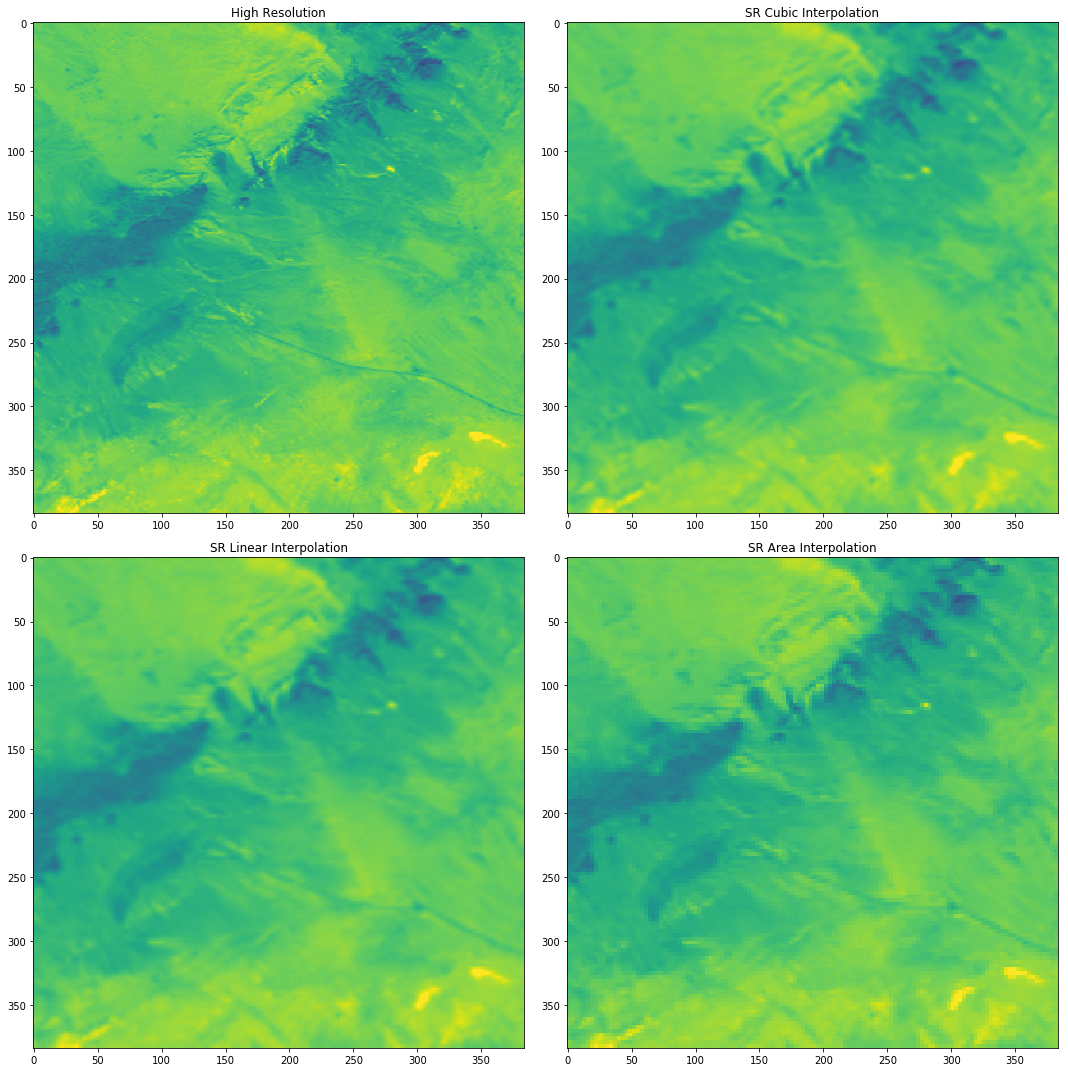

In [5]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221); ax1.imshow(hr, vmin=min_, vmax=max_); ax1.axis('on'); ax1.title.set_text('High Resolution')
ax4 = fig.add_subplot(222); ax4.imshow(average_prediction1, vmin=min_, vmax=max_); ax4.axis('on'); ax4.title.set_text('SR Cubic Interpolation')
ax5 = fig.add_subplot(223); ax5.imshow(average_prediction2, vmin=min_, vmax=max_); ax5.axis('on'); ax5.title.set_text('SR Linear Interpolation')
ax6 = fig.add_subplot(224); ax6.imshow(average_prediction3, vmin=min_, vmax=max_); ax6.axis('on'); ax6.title.set_text('SR Area Interpolation')

plt.tight_layout()


As wee can see, it seems that the CUBIC_INTERPOLATION from opencv is better than the LINEAR or AREA INTERPOLATION. 
Let's score the training data using theses methods to confirm that.

EDIT : the score on the train set confirm that.

In [6]:
import time

###############################
## -- CUBIC INTERPOLATION -- ##
###############################
begin = time.time()
predict = baseline_predict(datas, istrain=True, evaluate=True, version=1, interpolation=cv2.INTER_CUBIC)
print(time.time()-begin)

################################
## -- Linear INTERPOLATION -- ##
################################
begin = time.time()
predict = baseline_predict(datas, istrain=True, evaluate=True, version=1, interpolation=cv2.INTER_LINEAR)
print(time.time()-begin)

###############################
## -- AREA  INTERPOLATION -- ##
###############################
begin = time.time()
predict = baseline_predict(datas, istrain=True, evaluate=True, version=1, interpolation=cv2.INTER_AREA)
print(time.time()-begin)


evaluation 
 number of elements : 1160 
 Z = 0.9980326971984267
100.8709864616394
evaluation 
 number of elements : 1160 
 Z = 1.0071251910435146
98.08871650695801
evaluation 
 number of elements : 1160 
 Z = 1.0165096953947192
98.29339838027954


In [9]:
### Predict on test set
import time 
datas_train = load_data(os.path.join("data","train.txt"), istrain=False)
directory = "results_baseline_train"
begin = time.time()
baseline_predict_test(datas_train,dirs = directory, interpolation=cv2.INTER_CUBIC)
print(time.time()-begin)
# after submitting on the website the predict, this baseline give 0.998 in the leaderboard!

49.41137957572937


In [10]:
datas[0]

[['data/train/NIR/imgset0594\\LR000.png',
  'data/train/NIR/imgset0594\\LR001.png',
  'data/train/NIR/imgset0594\\LR002.png',
  'data/train/NIR/imgset0594\\LR003.png',
  'data/train/NIR/imgset0594\\LR004.png',
  'data/train/NIR/imgset0594\\LR005.png',
  'data/train/NIR/imgset0594\\LR006.png',
  'data/train/NIR/imgset0594\\LR007.png',
  'data/train/NIR/imgset0594\\LR008.png',
  'data/train/NIR/imgset0594\\LR009.png',
  'data/train/NIR/imgset0594\\LR010.png',
  'data/train/NIR/imgset0594\\LR011.png',
  'data/train/NIR/imgset0594\\LR012.png',
  'data/train/NIR/imgset0594\\LR013.png',
  'data/train/NIR/imgset0594\\LR014.png',
  'data/train/NIR/imgset0594\\LR015.png',
  'data/train/NIR/imgset0594\\LR016.png',
  'data/train/NIR/imgset0594\\LR017.png',
  'data/train/NIR/imgset0594\\LR018.png',
  'data/train/NIR/imgset0594\\LR019.png',
  'data/train/NIR/imgset0594\\LR020.png'],
 ['data/train/NIR/imgset0594\\QM000.png',
  'data/train/NIR/imgset0594\\QM001.png',
  'data/train/NIR/imgset0594\\QM0

In [72]:
norm = np.array([v[2] for v in datas])
norm.mean()

46.48945066448319